# 16. Regression

In [154]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"

%matplotlib inline

In [196]:
def calculate_f(df_n, df_d):
    
    critic_005, critic_001 = round(stats.f.ppf(0.95, df_n, df_d), 2), round(stats.f.ppf(0.99, df_n, df_d), 2)
    
    return critic_005, critic_001

---
![''](./16_src/16_01.png)

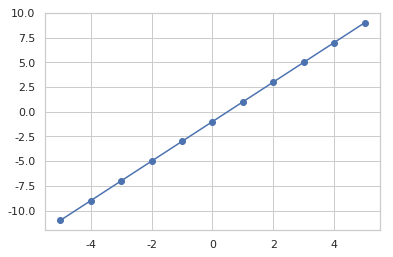

In [7]:
def f(x):
    return 2 * x - 1

x = np.linspace(-5, 5, 11)
plt.plot(x, f(x), '-o')

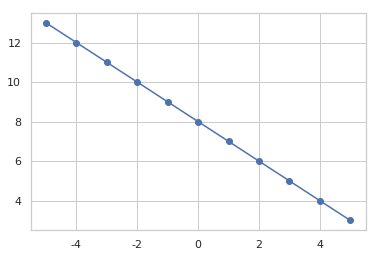

In [8]:
def f(x):
    return -1 * x + 8

x = np.linspace(-5, 5, 11)
plt.plot(x, f(x), '-o')

---
![''](./16_src/16_02.png)

- standard error of estimate가 가장 적은 경우

---
![''](./16_src/16_03.png)

In [9]:
SP, SS_x, SS_y, M_x, M_y = 10, 20, 80, 8, 10

SP, SS_x, SS_y, M_x, M_y

(10, 20, 80, 8, 10)

#### a. 

In [10]:
r = SP / np.sqrt(SS_x * SS_y)
r

0.25

#### b.

In [11]:
# b = SP / SS_x
# b = r * S_y / S_x
# a = M_y - b * M_x

In [13]:
b = SP / SS_x
a = M_y - b * M_x

a, b

(6.0, 0.5)

In [14]:
f'y = {b}X + {a}'

'y = 0.5X + 6.0'

---
![''](./16_src/16_04.png)

In [152]:
def f(x):
    return 2 * x + 6

x = [0, 2, 3, -4]
[f(i) for i in x]

[6, 10, 12, -2]

---
![''](./16_src/16_05.png)

- y, y_hat의 평균적 차이 (y - y_hat deviation의 평균)

---
![''](./16_src/16_06.png)

- 상관계수와 음의 상관관계를 지닌다. 
    - correlation가 클수록 the standard error of estimate는 작고, 
    - correlation가 작을수록 the standard error of estimate는 크다.

---
![''](./16_src/16_07.png)

In [15]:
# b = SP / SS_x
# a = M_y - b * M_x

In [221]:
df = pd.DataFrame({'X':[2, 7, 5, 3, 3, 4], 'Y':[1, 10, 8, 0, 4, 13]})
df

,X,Y
0,2,1
1,7,10
2,5,8
3,3,0
4,3,4
5,4,13


In [224]:
Y, X = df.Y, sm.add_constant(df.X)

model = sm.OLS(Y, X)
result = model.fit()

In [225]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3.657
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.128
Time:                        10:58:40   Log-Likelihood:                -15.884
No. Observations:                   6   AIC:                             35.77
Df Residuals:                       4   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0000      4.518     -0.443      0.6

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [222]:
def regression_equation(df):

    SP = ((df.X * df.Y)**2).sum() - (df.X**2).sum() * (df.Y**2).sum() / len(df)
    SS_x = (df.X **2).sum() - (df.X.sum()**2) / len(df)

    M_x = df.X.mean()
    M_y = df.Y.mean()

    # SP, SS_x, M_x, M_y
    b = SP / SS_x
    a = M_y - b * M_x
    
    return f'Y = {b} X + ({a})'
# a, b


In [223]:
regression_equation(df)

'Y = 176.16666666666669 X + (-698.6666666666667)'

---
![''](./16_src/16_08.png)

In [226]:
df = pd.DataFrame({'X':[3, 6, 5, 4, 7, 5], 'Y':[3, 9, 8, 3, 10, 9]})
df

,X,Y
0,3,3
1,6,9
2,5,8
3,4,3
4,7,10
5,5,9


#### a.

In [227]:
Y, X = df.Y, sm.add_constant(df.X)

model = sm.OLS(Y, X)
result = model.fit()

In [228]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     16.00
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0161
Time:                        11:00:12   Log-Likelihood:                -10.046
No. Observations:                   6   AIC:                             24.09
Df Residuals:                       4   BIC:                             23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0000      2.582     -1.162      0.3

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [229]:
f"Y = {round(result.params['X'])} X + ({round(result.params['const'])})"

'Y = 2.0 X + (-3.0)'

#### b.

In [230]:
r = df.corr()['X']['Y']
r2 = r**2
r2

0.7999999999999999

In [231]:
SS_y = ((df.Y**2).sum() - df.Y.sum()**2 / len(df))
SS_resid = (1 - r2) * SS_y
SS_resid

10.000000000000004

In [233]:
np.sqrt(SS_resid / (len(df) - 2))

1.58113883008419

---
![''](./16_src/16_09.png)

In [236]:
model = sm.OLS(Y, X)
result = model.fit()

In [237]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     16.00
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0161
Time:                        11:02:22   Log-Likelihood:                -10.046
No. Observations:                   6   AIC:                             24.09
Df Residuals:                       4   BIC:                             23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0000      2.582     -1.162      0.3

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


- Prob (F-statistic):           0.000103

---
![''](./16_src/16_10.png)

In [181]:
df = pd.DataFrame({'X':[3, 5, 2, 2, 4, 1, 4], 'Y':[8, 8, 6, 3, 6, 4, 7]})
df

,X,Y
0,3,8
1,5,8
2,2,6
3,2,3
4,4,6
5,1,4
6,4,7


#### a.

In [182]:
Y, X = df.Y, sm.add_constant(df.X)

model = sm.OLS(Y, X)
result = model.fit()

In [183]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     6.000
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0580
Time:                        10:24:53   Log-Likelihood:                -11.181
No. Observations:                   7   AIC:                             26.36
Df Residuals:                       5   BIC:                             26.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000      1.336      2.245      0.0

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [184]:
f"Y = {round(result.params['X'])} X + ({round(result.params['const'])})"

'Y = 1.0 X + (3.0)'

In [185]:
def f(x):
    return 1 * x + 3

[f(x) for x in df.X]

[6, 8, 5, 5, 7, 4, 7]

---
![''](./16_src/16_11.png)
![''](./16_src/16_11_02.png)

In [238]:
SP, SS_x, SS_y, M_x, M_y = 330, 18, 21609, 3, 88

# SP, SS_x, M_x, M_y
b = SP / SS_x
a = M_y - b * M_x

a, b

(33.0, 18.333333333333332)

In [239]:
df = pd.DataFrame({'X':[4, 5, 3, 2, 1, 3, 1, 5], 'Y':[151, 88, 52, 73, 49, 92, 56, 143]})
df

,X,Y
0,4,151
1,5,88
2,3,52
3,2,73
4,1,49
5,3,92
6,1,56
7,5,143


In [240]:
X, Y = df.X, df.Y
X = sm.add_constant(X)

In [247]:
df.corr()['X']['Y']
# **2

0.7390710888643178

In [246]:
SP / np.sqrt(SS_x * SS_y)

0.5291275233368723

In [241]:
model = sm.OLS(Y, X)
result = model.fit()

In [242]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.222
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0362
Time:                        11:03:50   Log-Likelihood:                -37.123
No. Observations:                   8   AIC:                             78.25
Df Residuals:                       6   BIC:                             78.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0000     22.881      1.442      0.1

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [112]:
print(result.params)

const    33.000000
X        18.333333
dtype: float64


In [97]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [99]:
lr.fit(df[['X']], df['Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
lr.coef_, lr.intercept_

(array([18.33333333]), 33.000000000000014)

#### b-c.

In [113]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.222
Date:                Sat, 28 Nov 2020   Prob (F-statistic):             0.0362
Time:                        23:49:29   Log-Likelihood:                -37.123
No. Observations:                   8   AIC:                             78.25
Df Residuals:                       6   BIC:                             78.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0000     22.881      1.442      0.1

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


---
![''](./16_src/16_12.png)

In [186]:
n = 15
M_x, SS_x = 580, 22400
M_y, SS_y = 3.1, 1.26
SP = 84

#### a.
- b = SP / SS_x
- a = M_y - M_x * b
- r = SP / np.sqrt(SS_x * SS_y)

In [187]:
b = SP / SS_x
a = M_y - M_x * b

print(f'Y = {b} X + {a}')

Y = 0.00375 X + 0.9250000000000003


#### b.

In [189]:
r = SP / np.sqrt(SS_x * SS_y)
r2 = r**2
r2

0.25

#### c.

In [191]:
# F = MS_regression / MS_residual
# MS_regression = SS_regression / k
# MS_residual = SS_residual / (n - 1 - k)

In [198]:
f_value = (r2*SS_y / 1) / (1 - r2)*SS_y / (n - 1 - 1)
critic_005 = calculate_f(1, n - 1 - 1)

f_value, critic_005, f_value > critic_005

(0.040707692307692306, (4.67, 9.07), array([False, False]))

---
![''](./16_src/16_13.png)
![''](./16_src/16_13_02.png)
![''](./16_src/16_13_03.png)

In [118]:
df = pd.DataFrame({'X':[3, 8, 10, 8, 4, 7, 4, 5, 14], 'Y':[11, 19, 22, 20, 14, 13, 9, 20, 25]})
Y, X = df.Y, df.X
X = sm.add_constant(X)

In [120]:
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     16.13
Date:                Sat, 28 Nov 2020   Prob (F-statistic):            0.00508
Time:                        23:58:13   Log-Likelihood:                -22.091
No. Observations:                   9   AIC:                             48.18
Df Residuals:                       7   BIC:                             48.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9286      2.497      3.175      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


---
![''](./16_src/16_14.png)

In [207]:
df = pd.DataFrame({'X':[39, 48, 59, 70, 74, 78, 81, 87, 88, 91], 'Y':[9.3, 10.9, 10.7, 9.1, 6.4, 9.1, 7.2, 7.9, 8.5, 9.0]})
Y, X = df.Y, df.X
X = sm.add_constant(X)

In [208]:
df.corr()

,X,Y
X,1.000000,-0.557233
Y,-0.557233,1.000000


In [209]:
(-0.557233)**2

0.31050861628899995

In [210]:
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.603
Date:                Sun, 29 Nov 2020   Prob (F-statistic):             0.0942
Time:                        10:39:41   Log-Likelihood:                -15.188
No. Observations:                  10   AIC:                             34.38
Df Residuals:                       8   BIC:                             34.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9794      1.715      6.986      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [211]:
f"Y = {result.params['X']} X + ({round(result.params['const'])})"

'Y = -0.04432731820618174 X + (12.0)'

---
![''](./16_src/16_15.png)

In [121]:
# SS_residual = (1 - r2)SS_y

In [122]:
r = 0.5
SS_y = 48
n = 18

#### a.

In [126]:
np.sqrt((1 - 0.5**2) * SS_y / (n - 2))

1.5

#### b.

In [127]:
n = 66
np.sqrt((1 - 0.5**2) * SS_y / (n - 2))

0.75

- 숫자가 커질수록 error은 줄어든다. 

---
![''](./16_src/16_16.png)

#### a.

In [212]:
(1 - 0.6**2)*200 / (10 - 2)

16.0

#### b.

In [213]:
(1 - 0.4**2)*200 / (10 - 2)

21.0

---
![''](./16_src/16_17.png)

#### a.

In [128]:
n = 20
k = 1

k, n - 1 - k

(1, 18)

#### b.

In [129]:
# k, n - 1 - k = 1, 23
k = 1
# n - 1 - k = 23
n = 23 + 1 + k
n

25

---
![''](./16_src/16_18.png)

In [214]:
df = pd.DataFrame({'X':[3, 5, 4, 2, 5, 5], 'Y':[2, 6, 9, 3, 6, 4]})
Y, X = df.Y, df.X
X = sm.add_constant(X)

In [215]:
df.corr()

,X,Y
X,1.0,0.5
Y,0.5,1.0


In [217]:
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.333
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.312
Time:                        10:47:30   Log-Likelihood:                -12.673
No. Observations:                   6   AIC:                             29.35
Df Residuals:                       4   BIC:                             28.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      3.606      0.277      0.7

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [218]:
f"Y = {result.params['X']} X + ({round(result.params['const'])})"

'Y = 0.9999999999999993 X + (1.0)'

---
![''](./16_src/16_19.png)

In [ ]:
r2 = 0.38


---
![''](./16_src/16_20.png)

---
![''](./16_src/16_21.png)
![''](./16_src/16_21_02.png)

In [132]:
df = pd.DataFrame({'Population Size':[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], 
                   'Amount for Prevention':[6, 7, 3, 4, 11, 12, 8, 9, 16, 17, 13, 14], 
                   'Number of Crimes':[3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17]})
# Y, X = dfY, df.X
X = sm.add_constant(df[['Population Size', 'Amount for Prevention']])
Y = df['Number of Crimes']

In [133]:
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Number of Crimes   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     91.33
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.05e-06
Time:                        00:40:37   Log-Likelihood:                -16.395
No. Observations:                  12   AIC:                             38.79
Df Residuals:                       9   BIC:                             40.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.155e-

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


---
![''](./16_src/16_22.png)

---
![''](./16_src/16_23.png)

In [134]:
df = pd.DataFrame({'X1':[1, 2, 3, 6, 4, 2], 
                   'X2':[3, 4, 5, 9, 8, 7], 
                   'Y':[1, 2, 6, 8, 3, 4]})
# Y, X = dfY, df.X
X = sm.add_constant(df[['X1', 'X2']])
Y = df['Y']

In [135]:
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2.966
Date:                Sun, 29 Nov 2020   Prob (F-statistic):              0.195
Time:                        00:48:24   Log-Likelihood:                -10.444
No. Observations:                   6   AIC:                             26.89
Df Residuals:                       3   BIC:                             26.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5645      2.482      0.227      0.8

/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [151]:
eq = f"Y = {result.params['X1']} X1 + {result.params['X2']} X2 + {result.params['const']}"
eq

'Y = 1.2419354838709686 X1 + -0.04838709677419406 X2 + 0.5645161290322589'

---
![''](./16_src/16_24.png)